In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [3]:
train = pd.read_csv('D:/HW/MLPS/MLPS_project/train_users_2.csv/train_users_2.csv')
test = pd.read_csv('D:/HW/MLPS/MLPS_project/test_users.csv/test_users.csv')
age_bckt = pd.read_csv('D:/HW/MLPS/MLPS_project/age_gender_bkts.csv/age_gender_bkts.csv')
session = pd.read_csv('D:/HW/MLPS/sessions.csv/sessions.csv')

In [4]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


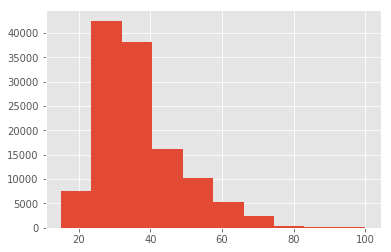

In [5]:
train.age.hist(bins=10)

In [6]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

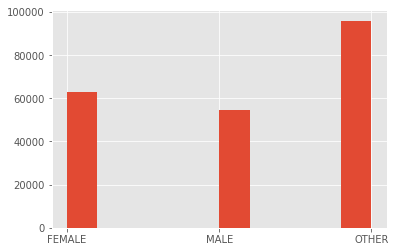

In [7]:
train.gender.hist(bins=10)

In [8]:
train['gender'].describe()

count     213451
unique         3
top        OTHER
freq       95970
Name: gender, dtype: object

In [10]:
train.timestamp_first_active[0]

20090319043255

In [11]:
col = train.timestamp_first_active
year= [int(str(col[i])[:4]) for i in range(len(col))]
month= [int(str(col[i])[4:6]) for i in range(len(col))]
date = [int(str(col[i])[4:8]) for i in range(len(col))]
hour = [int(str(col[i])[8:10]) for i in range(len(col))]
minn = [int(str(col[i])[10:12]) for i in range(len(col))]
secs = [int(str(col[i])[12:]) for i in range(len(col))]

In [12]:
train.drop('timestamp_first_active', axis=1, inplace=True)

In [13]:
browser_type = train.first_browser
train.first_browser = np.where(browser_type=='-unknown-', 'OTHER', browser_type)

In [14]:
from collections import Counter
dict1 = Counter(train.signup_method)

Counter({'basic': 152897, 'facebook': 60008, 'google': 546})


([<matplotlib.axis.XTick at 0x21fa75a3c88>,
 <a list of 3 Text xticklabel objects>)

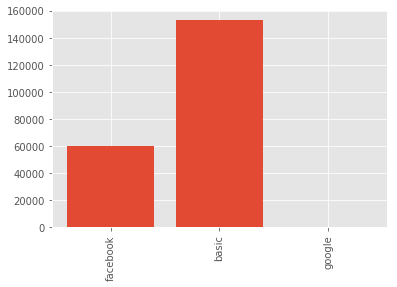

In [15]:
y=list(dict1.values())
x=list(dict1.keys())
print(dict1)
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x, rotation=90)

In [16]:
train.drop('date_first_booking', axis=1, inplace=True)

In [17]:
train.first_affiliate_tracked.value_counts()
train.first_affiliate_tracked.fillna('untracked',inplace=True)
train.first_affiliate_tracked.value_counts()

untracked        115297
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

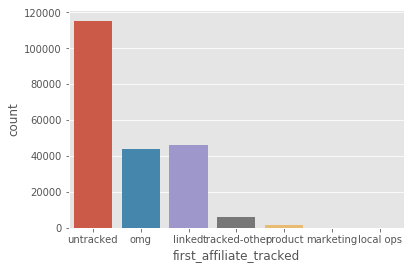

In [18]:
import seaborn as sns
sns.countplot(train.first_affiliate_tracked)
train['age'].fillna(-1, inplace=True)

In [19]:
train.isnull().sum()

id                         0
date_account_created       0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [21]:
session["action_type"].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [22]:
train.country_destination.value_counts(dropna=False)

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

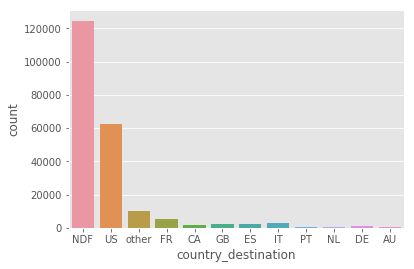

In [23]:
sns.countplot(train.country_destination)

In [24]:
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [25]:
nan_vals = session.loc[session['action'].isnull(), :]
nan_vals["action_type"].value_counts()
nan_vals["action_detail"].value_counts()

message_post    79626
Name: action_detail, dtype: int64

In [26]:
session.action_type.value_counts()
session.action_type.fillna('-unknown-',inplace=True)
session.action_type.value_counts()

view                3560902
-unknown-           2157374
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [27]:
session.action_detail.value_counts()
session.action_detail.fillna('-unknown-',inplace=True)
session.action_detail.value_counts().head()

-unknown-                  2157345
view_search_results        1776885
p3                         1376550
wishlist_content_update     706824
user_profile                656839
Name: action_detail, dtype: int64

In [28]:
session.isnull().sum()

user_id           34496
action            79626
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

In [29]:
session.secs_elapsed.fillna(0,inplace=True)
session['action'].fillna('unknown', inplace=True)

In [30]:
session.dropna(subset=['user_id'],inplace=True)

In [31]:
session.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [26]:
##Data Cleaning of session file and train file done.
##todo: Merging of session file
##tdo EDA

In [32]:
age_val = age_bckt.age_bucket.values

age_val = np.array(age_val)

age_bckt['age_bucket'] = np.where(np.logical_or(age_val=='0-4', age_val=='5-9'), np.nan, age_val)
age_val = age_bckt.age_bucket.values

age_bckt['age_bucket'] = np.where(age_val=='100+', np.nan, age_val)

In [33]:
import math
bckt = []
for i in range(len(train)):
    if(train.age.values[i]!=-1):
        if(int(train.age.values[i]/5) == 1):
            bckt.append('5-9')
        elif(int(train.age.values[i]/5) == 2):
            bckt.append('10-14')
        elif(int(train.age.values[i]/5) == 3):
            bckt.append('15-19')
        elif(int(train.age.values[i]/5) == 4):
            bckt.append('20-24')
        elif(int(train.age.values[i]/5) == 5):
            bckt.append('25-29')
        elif(int(train.age.values[i]/5) == 6):
            bckt.append('30-34')
        elif(int(train.age.values[i]/5) == 7):
            bckt.append('35-39')
        elif(int(train.age.values[i]/5) == 8):
            bckt.append('40-44')
        elif(int(train.age.values[i]/5) == 9):
            bckt.append('45-49')
        elif(int(train.age.values[i]/5) == 10):
            bckt.append('50-54')
        elif(int(train.age.values[i]/5) == 11):
            bckt.append('55-59')
        elif(int(train.age.values[i]/5) == 12):
            bckt.append('60-64')
        elif(int(train.age.values[i]/5) == 13):
            bckt.append('65-69')
        elif(int(train.age.values[i]/5) == 14):
            bckt.append('70-74')
        elif(int(train.age.values[i]/5) == 15):
            bckt.append('75-79')
        elif(int(train.age.values[i]/5) == 16):
            bckt.append('80-84')
        elif(int(train.age.values[i]/5) == 17):
            bckt.append('85-89')
        elif(int(train.age.values[i]/5) == 18):
            bckt.append('90-94')
        elif(int(train.age.values[i]/5) == 19):
            bckt.append('95-99')
        else:
            bckt.append('-1')
    else:
        bckt.append('-1')
train['age_bucket'] = bckt

In [62]:
merged = pd.merge(train, age_bckt, how="left", left_on=["age_bucket","country_destination","gender"],
                  right_on=["age_bucket","country_destination","gender"])

ValueError: len(right_on) must equal len(left_on)

In [63]:
train.head(20)

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bucket
0,gxn3p5htnn,2010-06-28,OTHER,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,-1
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-39
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-59
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,40-44
4,87mebub9p4,2010-09-14,OTHER,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,40-44
5,osr2jwljor,2010-01-01,OTHER,-1.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,-1
6,lsw9q7uk0j,2010-01-02,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,45-49
7,0d01nltbrs,2010-01-03,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,45-49
8,a1vcnhxeij,2010-01-04,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,50-54
9,6uh8zyj2gn,2010-01-04,OTHER,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,45-49
